In [181]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import warnings

In [182]:
raw_dataset = pd.read_csv('C:\ChiefWarden\data\ClaMP_Integrated-5184.csv')

In [183]:
raw_dataset

,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,CreationYear,FH_char0,FH_char1,...,sus_sections,non_sus_sections,packer,packer_type,E_text,E_data,filesize,E_file,fileinfo,class
0,144,3,4,65535,184,256,4,1,0,1,...,1,3,0,NoPacker,6.603616,5.443362,1181520,6.627552,1,0
1,144,3,4,65535,184,184,4,1,0,1,...,1,3,0,NoPacker,5.205926,2.123522,7680,5.318221,0,0
2,144,3,4,65535,184,272,5,1,0,1,...,1,4,0,NoPacker,6.238000,3.380859,57872,6.507758,1,0
3,144,3,4,65535,184,184,1,1,0,1,...,0,1,0,NoPacker,0.000000,0.000000,95616,4.575092,1,0
4,144,3,4,65535,184,224,5,1,0,1,...,1,4,0,NoPacker,6.355626,0.702621,48128,5.545531,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5205,144,3,4,65535,184,216,5,1,1,1,...,0,5,0,NoPacker,6.174602,3.155928,365568,7.546568,0,1
5206,80,2,4,65535,184,256,7,1,0,1,...,4,3,0,NoPacker,0.000000,0.000000,98816,6.947195,0,1
5207,144,3,4,65535,184,216,5,1,0,1,...,2,3,0,NoPacker,6.503422,3.790871,227328,7.823114,0,1
5208,144,3,4,65535,184,248,5,1,1,1,...,1,4,0,NoPacker,6.115208,7.919091,271616,7.886012,0,1


In [184]:
raw_dataset['packer_type']

0       NoPacker
1       NoPacker
2       NoPacker
3       NoPacker
4       NoPacker
          ...   
5205    NoPacker
5206    NoPacker
5207    NoPacker
5208    NoPacker
5209    NoPacker
Name: packer_type, Length: 5210, dtype: object

In [185]:
categorical_cols = ['packer_type' , 'fileinfo']
for col in categorical_cols:
    print(f"{col}: {raw_dataset[col].unique()}")
    


packer_type: ['NoPacker' 'Armadillov1xxv2xx' 'NETexecutableMicrosoft' 'NETDLLMicrosoft'
 'VideoLanClient' 'Armadillov171' 'MicrosoftVisualCV80Debug'
 'BobSoftMiniDelphiBoBBobSoft' 'InstallShieldCustom'
 'UPX290LZMAMarkusOberhumerLaszloMolnarJohnReiser'
 'UPXv20MarkusLaszloReiser' 'MinGWGCC3x' 'WiseInstallerStub'
 'MacromediaWindowsFlashProjectorPlayerv60' 'AsCryptv01SToRM5'
 'WinZip32bitSFXv8xmodule' 'MacromediaWindowsFlashProjectorPlayerv50'
 'InstallShield2000' 'UPXProtectorv10x2'
 'UPXV200V290MarkusOberhumerLaszloMolnarJohnReiser'
 'ProtectSharewareV11eCompservCMS' 'PECompactV2XBitsumTechnologies'
 'StelthPE101BGCorp' 'ASProtect13321RegisteredAlexeySolodovnikov'
 'nSpackV2xLiuXingPing'
 'UPX293300LZMAMarkusOberhumerLaszloMolnarJohnReiser' 'AHPack01FEUERRADER'
 'ASPackv212AlexeySolodovnikov' 'PureBasic4xNeilHodgson'
 'Upackv039finalDwing' 'PrivateexeProtector21522XSetiSoftTeam'
 'PECompact2xxSlimLoaderBitSumTechnologies' 'CrunchPE'
 'tElock09910privatetE' 'D1S1Gv11betaD1N' 'Safe20'
 

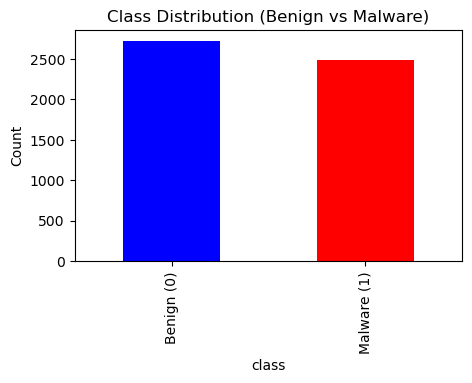

In [186]:
import matplotlib.pyplot as plt

class_counts = raw_dataset['class'].value_counts()
plt.figure(figsize=(5,3))
class_counts.plot(kind='bar', color=['blue', 'red'])
plt.title("Class Distribution (Benign vs Malware)")
plt.xticks(ticks=[0,1], labels=['Benign (0)', 'Malware (1)'])
plt.ylabel("Count")
plt.show()

In [187]:
raw_dataset = pd.get_dummies(raw_dataset, columns=['packer_type'], drop_first=True)
raw_dataset = raw_dataset.astype(int)



In [188]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import joblib


In [189]:
X = raw_dataset.drop(columns=["class"])
Y = raw_dataset["class"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
import joblib
joblib.dump(xgb.fit(X_train, Y_train), 'baseline_xgb_model.joblib')


c:\ProgramData\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:13:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


['baseline_xgb_model.joblib']

In [190]:
from sklearn.metrics import accuracy_score, classification_report
Y_pred = xgb.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

from sklearn.metrics import accuracy_score, classification_report
Y_pred = xgb.predict(X_train)

accuracy = accuracy_score(Y_train, Y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(Y_train, Y_pred))

Test Accuracy: 0.9894

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       498
           1       0.99      0.99      0.99       544

    accuracy                           0.99      1042
   macro avg       0.99      0.99      0.99      1042
weighted avg       0.99      0.99      0.99      1042

Test Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1990
           1       1.00      1.00      1.00      2178

    accuracy                           1.00      4168
   macro avg       1.00      1.00      1.00      4168
weighted avg       1.00      1.00      1.00      4168



In [191]:
import lief
import pefile
import pandas as pd
import os
from datetime import datetime

# Path to EXE file
exe_path = "C:\\Windows\\System32\\notepad.exe"

# Parse with LIEF
binary = lief.parse(exe_path)
if binary is None:
    raise ValueError("Failed to parse the binary file.")

# Parse with pefile (for validation)
pe = pefile.PE(exe_path)

# Initialize features dictionary
features = {}

### ✅ IMAGE_DOS_HEADER fields
dos_header = binary.dos_header
features["e_cblp"] = dos_header.used_bytes_in_last_page
features["e_cp"] = dos_header.file_size_in_pages
features["e_cparhdr"] = dos_header.header_size_in_paragraphs
features["e_maxalloc"] = dos_header.maximum_extra_paragraphs
features["e_sp"] = dos_header.initial_sp
features["e_lfanew"] = dos_header.addressof_new_exeheader

### ✅ FILE_HEADER fields
file_header = binary.header
features["NumberOfSections"] = file_header.numberof_sections
features["CreationYear"] = datetime.utcfromtimestamp(file_header.time_date_stamps).year

# Date Created Heuristic: If year is before 1995, assume false; otherwise, assume true.
features["dateCreated"] = 1 if features["CreationYear"] >= 1995 else 0

# FILE_HEADER characteristics (Bit Flags)
for i in range(15):
    features[f"FH_char{i}"] = int(bool(file_header.characteristics & (1 << i)))

### ✅ OPTIONAL_HEADER fields
optional_header = binary.optional_header
features["MajorLinkerVersion"] = optional_header.major_linker_version
features["MinorLinkerVersion"] = optional_header.minor_linker_version
features["SizeOfCode"] = optional_header.sizeof_code
features["SizeOfInitializedData"] = optional_header.sizeof_initialized_data
features["SizeOfUninitializedData"] = optional_header.sizeof_uninitialized_data
features["AddressOfEntryPoint"] = optional_header.addressof_entrypoint
features["BaseOfCode"] = optional_header.baseof_code
features["BaseOfData"] = getattr(optional_header, "baseof_data", 0)
features["ImageBase"] = optional_header.imagebase
features["SectionAlignment"] = optional_header.section_alignment
features["FileAlignment"] = optional_header.file_alignment
features["MajorOperatingSystemVersion"] = optional_header.major_operating_system_version
features["MinorOperatingSystemVersion"] = optional_header.minor_operating_system_version
features["MajorImageVersion"] = optional_header.major_image_version
features["MinorImageVersion"] = optional_header.minor_image_version
features["MajorSubsystemVersion"] = optional_header.major_subsystem_version
features["MinorSubsystemVersion"] = optional_header.minor_subsystem_version
features["SizeOfImage"] = optional_header.sizeof_image
features["SizeOfHeaders"] = optional_header.sizeof_headers
features["CheckSum"] = optional_header.checksum
features["Subsystem"] = optional_header.subsystem

# OPTIONAL_HEADER DLL characteristics (Bit Flags)
for i in range(11):
    features[f"OH_DLLchar{i}"] = int(bool(optional_header.dll_characteristics & (1 << i)))

# Stack & Heap Sizes
features["SizeOfStackReserve"] = optional_header.sizeof_stack_reserve
features["SizeOfStackCommit"] = optional_header.sizeof_stack_commit
features["SizeOfHeapReserve"] = optional_header.sizeof_heap_reserve
features["SizeOfHeapCommit"] = optional_header.sizeof_heap_commit
features["LoaderFlags"] = optional_header.loader_flags

### ✅ SECTION ANALYSIS
sus_sections = 0
non_sus_sections = 0
for section in binary.sections:
    entropy = section.entropy
    if entropy > 7.5:  # Heuristic for packed sections
        sus_sections += 1
    else:
        non_sus_sections += 1
features["sus_sections"] = sus_sections
features["non_sus_sections"] = non_sus_sections

### ✅ PACKER DETECTION (Real Identifications)
packer_signatures = {
    "ASPackv10803AlexeySolodovnikov": "ASPack",
    "ASPackv212AlexeySolodovnikov": "ASPack",
    "Armadillov171": "Armadillo",
    "Armadillov1xxv2xx": "Armadillo",
    "UPX290LZMAMarkusOberhumerLaszloMolnarJohnReiser": "UPX",
    "UPXProtectorv10x2": "UPX",
    "UPXv20MarkusLaszloReiser": "UPX",
    "PECompactV2XBitsumTechnologies": "PECompact",
    "PECompact2xxSlimLoaderBitSumTechnologies": "PECompact",
    "WinZip32bitSFXv8xmodule": "WinZip",
    "nSpackV2xLiuXingPing": "nSpack",
    "InstallShield2000": "InstallShield",
    "InstallShieldCustom": "InstallShield",
    "VideoLanClient": "VideoLAN",
    "StelthPE101BGCorp": "StelthPE",
    "Safe20": "Safe",
    "XtremeProtectorv105": "XtremeProtector",
}

# Extract packer using LIEF (if available)
detected_packer = None
if binary.overlay:  # Overlay presence is a strong indicator of packing
    for packer, signature in packer_signatures.items():
        if signature.lower() in str(binary.overlay).lower():
            detected_packer = packer
            break

# Initialize all packers as 0
for packer in packer_signatures.keys():
    features[f"packer_type_{packer}"] = 0

# Set detected packer or mark as "NoPacker"
if detected_packer:
    features[f"packer_type_{detected_packer}"] = 1
    features["packer"] = 1
else:
    features["packer_type_NoPacker"] = 1
    features["packer"] = 0

### ✅ FILE SIZE & ENTRY POINT SECTION
features["filesize"] = binary.virtual_size

entry_point_rva = optional_header.addressof_entrypoint
entry_section = None
for section in binary.sections:
    if section.virtual_address <= entry_point_rva < (section.virtual_address + section.size):
        entry_section = section.name
        break
features["E_text"] = 1 if entry_section == ".text" else 0
features["E_data"] = 1 if entry_section == ".data" else 0
features["E_file"] = 1 if entry_section is not None else 0

features["fileinfo"] = 1  # Always set to 1

### ✅ Convert to DataFrame
df = pd.DataFrame([features])

# Ensure int64 format
for col in df.columns:
    if col != "Subsystem":
        df[col] = df[col].astype("int64")

# Save as CSV
df.to_csv("notepad_features.csv", index=False)
print("Feature extraction completed and saved as 'notepad_features.csv'.")


Feature extraction completed and saved as 'notepad_features.csv'.


In [192]:
import joblib
import pandas as pd

# Load the trained XGBoost model
model_path = "baseline_xgb_model.joblib"
xgb_model = joblib.load(model_path)

# Load extracted features
features_path = "notepad_features.csv"
df = pd.read_csv(features_path)

# Drop "fileinfo" if present (since it's not a feature)
if "fileinfo" in df.columns:
    df = df.drop(columns=["fileinfo"])

# Convert "Subsystem" to a numeric category
if "Subsystem" in df.columns:
    df["Subsystem"] = df["Subsystem"].astype("category").cat.codes  # Encode as integer

# Ensure all columns are numeric
df = df.apply(pd.to_numeric, errors="coerce")

# Make prediction
prediction = xgb_model.predict(df)
probability = xgb_model.predict_proba(df)[:, 1]  # Probability of malware

# Display result
print(f"Predicted Class: {'Malware' if prediction[0] == 1 else 'Benign'}")
print(f"Malware Probability: {probability[0]:.4f}")


ValueError: feature_names mismatch: ['e_cblp', 'e_cp', 'e_cparhdr', 'e_maxalloc', 'e_sp', 'e_lfanew', 'NumberOfSections', 'CreationYear', 'FH_char0', 'FH_char1', 'FH_char2', 'FH_char3', 'FH_char4', 'FH_char5', 'FH_char6', 'FH_char7', 'FH_char8', 'FH_char9', 'FH_char10', 'FH_char11', 'FH_char12', 'FH_char13', 'FH_char14', 'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode', 'SizeOfInitializedData', 'SizeOfUninitializedData', 'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase', 'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion', 'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion', 'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage', 'SizeOfHeaders', 'CheckSum', 'Subsystem', 'OH_DLLchar0', 'OH_DLLchar1', 'OH_DLLchar2', 'OH_DLLchar3', 'OH_DLLchar4', 'OH_DLLchar5', 'OH_DLLchar6', 'OH_DLLchar7', 'OH_DLLchar8', 'OH_DLLchar9', 'OH_DLLchar10', 'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve', 'SizeOfHeapCommit', 'LoaderFlags', 'sus_sections', 'non_sus_sections', 'packer', 'E_text', 'E_data', 'filesize', 'E_file', 'fileinfo', 'packer_type_ASPackv10803AlexeySolodovnikov', 'packer_type_ASPackv212AlexeySolodovnikov', 'packer_type_ASProtect13321RegisteredAlexeySolodovnikov', 'packer_type_Armadillov171', 'packer_type_Armadillov1xxv2xx', 'packer_type_AsCryptv01SToRM5', 'packer_type_BobSoftMiniDelphiBoBBobSoft', 'packer_type_CrunchPE', 'packer_type_D1S1Gv11betaD1N', 'packer_type_InstallShield2000', 'packer_type_InstallShieldCustom', 'packer_type_MacromediaWindowsFlashProjectorPlayerv50', 'packer_type_MacromediaWindowsFlashProjectorPlayerv60', 'packer_type_MicrosoftVisualCV80Debug', 'packer_type_MinGWGCC3x', 'packer_type_NETDLLMicrosoft', 'packer_type_NETexecutableMicrosoft', 'packer_type_NoPacker', 'packer_type_PECompact2xxSlimLoaderBitSumTechnologies', 'packer_type_PECompactV2XBitsumTechnologies', 'packer_type_PECompactv2xx', 'packer_type_PEPaCKv10CCopyright1998byANAKiN', 'packer_type_PrivateexeProtector21522XSetiSoftTeam', 'packer_type_ProtectSharewareV11eCompservCMS', 'packer_type_PureBasic4xNeilHodgson', 'packer_type_Safe20', 'packer_type_StelthPE101BGCorp', 'packer_type_UPX290LZMAMarkusOberhumerLaszloMolnarJohnReiser', 'packer_type_UPX293300LZMAMarkusOberhumerLaszloMolnarJohnReiser', 'packer_type_UPXProtectorv10x2', 'packer_type_UPXV200V290MarkusOberhumerLaszloMolnarJohnReiser', 'packer_type_UPXv20MarkusLaszloReiser', 'packer_type_Upackv039finalDwing', 'packer_type_VideoLanClient', 'packer_type_WinZip32bitSFXv8xmodule', 'packer_type_WiseInstallerStub', 'packer_type_XtremeProtectorv105', 'packer_type_nSpackV2xLiuXingPing', 'packer_type_tElock09910privatetE'] ['e_cblp', 'e_cp', 'e_cparhdr', 'e_maxalloc', 'e_sp', 'e_lfanew', 'NumberOfSections', 'CreationYear', 'dateCreated', 'FH_char0', 'FH_char1', 'FH_char2', 'FH_char3', 'FH_char4', 'FH_char5', 'FH_char6', 'FH_char7', 'FH_char8', 'FH_char9', 'FH_char10', 'FH_char11', 'FH_char12', 'FH_char13', 'FH_char14', 'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode', 'SizeOfInitializedData', 'SizeOfUninitializedData', 'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase', 'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion', 'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion', 'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage', 'SizeOfHeaders', 'CheckSum', 'Subsystem', 'OH_DLLchar0', 'OH_DLLchar1', 'OH_DLLchar2', 'OH_DLLchar3', 'OH_DLLchar4', 'OH_DLLchar5', 'OH_DLLchar6', 'OH_DLLchar7', 'OH_DLLchar8', 'OH_DLLchar9', 'OH_DLLchar10', 'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve', 'SizeOfHeapCommit', 'LoaderFlags', 'sus_sections', 'non_sus_sections', 'packer_type_ASPackv10803AlexeySolodovnikov', 'packer_type_ASPackv212AlexeySolodovnikov', 'packer_type_Armadillov171', 'packer_type_Armadillov1xxv2xx', 'packer_type_UPX290LZMAMarkusOberhumerLaszloMolnarJohnReiser', 'packer_type_UPXProtectorv10x2', 'packer_type_UPXv20MarkusLaszloReiser', 'packer_type_PECompactV2XBitsumTechnologies', 'packer_type_PECompact2xxSlimLoaderBitSumTechnologies', 'packer_type_WinZip32bitSFXv8xmodule', 'packer_type_nSpackV2xLiuXingPing', 'packer_type_InstallShield2000', 'packer_type_InstallShieldCustom', 'packer_type_VideoLanClient', 'packer_type_StelthPE101BGCorp', 'packer_type_Safe20', 'packer_type_XtremeProtectorv105', 'packer_type_NoPacker', 'packer', 'filesize', 'E_text', 'E_data', 'E_file']
expected packer_type_PrivateexeProtector21522XSetiSoftTeam, packer_type_NETexecutableMicrosoft, packer_type_Upackv039finalDwing, packer_type_UPXV200V290MarkusOberhumerLaszloMolnarJohnReiser, fileinfo, packer_type_ASProtect13321RegisteredAlexeySolodovnikov, packer_type_CrunchPE, packer_type_UPX293300LZMAMarkusOberhumerLaszloMolnarJohnReiser, packer_type_PureBasic4xNeilHodgson, packer_type_WiseInstallerStub, packer_type_MacromediaWindowsFlashProjectorPlayerv50, packer_type_MicrosoftVisualCV80Debug, packer_type_AsCryptv01SToRM5, packer_type_tElock09910privatetE, packer_type_PEPaCKv10CCopyright1998byANAKiN, packer_type_PECompactv2xx, packer_type_NETDLLMicrosoft, packer_type_ProtectSharewareV11eCompservCMS, packer_type_D1S1Gv11betaD1N, packer_type_MinGWGCC3x, packer_type_BobSoftMiniDelphiBoBBobSoft, packer_type_MacromediaWindowsFlashProjectorPlayerv60 in input data
training data did not have the following fields: dateCreated

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
import joblib

# Suppress warnings
warnings.filterwarnings("ignore")

# Load dataset (Use raw string or double backslashes)
raw_dataset = pd.read_csv(r'C:\ChiefWarden\data\ClaMP_Integrated-5184.csv')

# Identify categorical columns
categorical_cols = ['packer_type', 'fileinfo']
for col in categorical_cols:
    print(f"{col}: {raw_dataset[col].unique()}")

# One-hot encode categorical columns
raw_dataset = pd.get_dummies(raw_dataset, columns=categorical_cols, drop_first=True)

# Separate features (X) and target (Y)
X = raw_dataset.drop(columns=["class"])
Y = raw_dataset["class"]

# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Train XGBoost classifier
xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_train, Y_train)

# Save the model
joblib.dump(xgb, 'baseline_xgb_model.joblib')

# Evaluate on test set
Y_test_pred = xgb.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nTest Classification Report:")
print(classification_report(Y_test, Y_test_pred))

# Evaluate on training set
Y_train_pred = xgb.predict(X_train)
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print(f"\nTrain Accuracy: {train_accuracy:.4f}")
print("\nTrain Classification Report:")
print(classification_report(Y_train, Y_train_pred))


packer_type: ['NoPacker' 'Armadillov1xxv2xx' 'NETexecutableMicrosoft' 'NETDLLMicrosoft'
 'VideoLanClient' 'Armadillov171' 'MicrosoftVisualCV80Debug'
 'BobSoftMiniDelphiBoBBobSoft' 'InstallShieldCustom'
 'UPX290LZMAMarkusOberhumerLaszloMolnarJohnReiser'
 'UPXv20MarkusLaszloReiser' 'MinGWGCC3x' 'WiseInstallerStub'
 'MacromediaWindowsFlashProjectorPlayerv60' 'AsCryptv01SToRM5'
 'WinZip32bitSFXv8xmodule' 'MacromediaWindowsFlashProjectorPlayerv50'
 'InstallShield2000' 'UPXProtectorv10x2'
 'UPXV200V290MarkusOberhumerLaszloMolnarJohnReiser'
 'ProtectSharewareV11eCompservCMS' 'PECompactV2XBitsumTechnologies'
 'StelthPE101BGCorp' 'ASProtect13321RegisteredAlexeySolodovnikov'
 'nSpackV2xLiuXingPing'
 'UPX293300LZMAMarkusOberhumerLaszloMolnarJohnReiser' 'AHPack01FEUERRADER'
 'ASPackv212AlexeySolodovnikov' 'PureBasic4xNeilHodgson'
 'Upackv039finalDwing' 'PrivateexeProtector21522XSetiSoftTeam'
 'PECompact2xxSlimLoaderBitSumTechnologies' 'CrunchPE'
 'tElock09910privatetE' 'D1S1Gv11betaD1N' 'Safe20'
 

In [205]:
# Print each feature name and its data type
print("Feature Name , Data Type")
for col in X.columns:
    print(f"{col} , {X[col].dtype}")


Feature Name , Data Type
e_cblp , int64
e_cp , int64
e_cparhdr , int64
e_maxalloc , int64
e_sp , int64
e_lfanew , int64
NumberOfSections , int64
CreationYear , int64
FH_char0 , int64
FH_char1 , int64
FH_char2 , int64
FH_char3 , int64
FH_char4 , int64
FH_char5 , int64
FH_char6 , int64
FH_char7 , int64
FH_char8 , int64
FH_char9 , int64
FH_char10 , int64
FH_char11 , int64
FH_char12 , int64
FH_char13 , int64
FH_char14 , int64
MajorLinkerVersion , int64
MinorLinkerVersion , int64
SizeOfCode , int64
SizeOfInitializedData , int64
SizeOfUninitializedData , int64
AddressOfEntryPoint , int64
BaseOfCode , int64
BaseOfData , int64
ImageBase , int64
SectionAlignment , int64
FileAlignment , int64
MajorOperatingSystemVersion , int64
MinorOperatingSystemVersion , int64
MajorImageVersion , int64
MinorImageVersion , int64
MajorSubsystemVersion , int64
MinorSubsystemVersion , int64
SizeOfImage , int64
SizeOfHeaders , int64
CheckSum , int64
Subsystem , int64
OH_DLLchar0 , int64
OH_DLLchar1 , int64
OH_DLLc

In [213]:
import pefile
import pandas as pd
import numpy as np
from datetime import datetime

def calculate_entropy(data):
    """Calculate entropy of a given byte array."""
    if not data:
        return 0.0
    entropy = 0.0
    data_size = len(data)
    frequency = [0] * 256
    for byte in data:
        frequency[byte] += 1
    for count in frequency:
        if count == 0:
            continue
        p = float(count) / data_size
        entropy -= p * np.log2(p)
    return entropy

def extract_features(file_path):
    # Load the PE file
    pe = pefile.PE(file_path)

    # Initialize a dictionary to store features
    features = {}

    # DOS Header Features
    features["e_cblp"] = int(pe.DOS_HEADER.e_cblp)
    features["e_cp"] = int(pe.DOS_HEADER.e_cp)
    features["e_cparhdr"] = int(pe.DOS_HEADER.e_cparhdr)
    features["e_maxalloc"] = int(pe.DOS_HEADER.e_maxalloc)
    features["e_sp"] = int(pe.DOS_HEADER.e_sp)
    features["e_lfanew"] = int(pe.DOS_HEADER.e_lfanew)

    # File Header Features
    features["NumberOfSections"] = int(pe.FILE_HEADER.NumberOfSections)
    features["CreationYear"] = int(datetime.fromtimestamp(pe.FILE_HEADER.TimeDateStamp).year)

    # Characteristics (FH_char0 to FH_char14)
    for i in range(15):
        features[f"FH_char{i}"] = int((pe.FILE_HEADER.Characteristics >> i) & 1)

    # Optional Header Features
    features["MajorLinkerVersion"] = int(pe.OPTIONAL_HEADER.MajorLinkerVersion)
    features["MinorLinkerVersion"] = int(pe.OPTIONAL_HEADER.MinorLinkerVersion)
    features["SizeOfCode"] = int(pe.OPTIONAL_HEADER.SizeOfCode)
    features["SizeOfInitializedData"] = int(pe.OPTIONAL_HEADER.SizeOfInitializedData)
    features["SizeOfUninitializedData"] = int(pe.OPTIONAL_HEADER.SizeOfUninitializedData)
    features["AddressOfEntryPoint"] = int(pe.OPTIONAL_HEADER.AddressOfEntryPoint)
    features["BaseOfCode"] = int(pe.OPTIONAL_HEADER.BaseOfCode)
    features["BaseOfData"] = int(pe.OPTIONAL_HEADER.BaseOfData) if hasattr(pe.OPTIONAL_HEADER, "BaseOfData") else 0
    features["ImageBase"] = int(pe.OPTIONAL_HEADER.ImageBase)
    features["SectionAlignment"] = int(pe.OPTIONAL_HEADER.SectionAlignment)
    features["FileAlignment"] = int(pe.OPTIONAL_HEADER.FileAlignment)
    features["MajorOperatingSystemVersion"] = int(pe.OPTIONAL_HEADER.MajorOperatingSystemVersion)
    features["MinorOperatingSystemVersion"] = int(pe.OPTIONAL_HEADER.MinorOperatingSystemVersion)
    features["MajorImageVersion"] = int(pe.OPTIONAL_HEADER.MajorImageVersion)
    features["MinorImageVersion"] = int(pe.OPTIONAL_HEADER.MinorImageVersion)
    features["MajorSubsystemVersion"] = int(pe.OPTIONAL_HEADER.MajorSubsystemVersion)
    features["MinorSubsystemVersion"] = int(pe.OPTIONAL_HEADER.MinorSubsystemVersion)
    features["SizeOfImage"] = int(pe.OPTIONAL_HEADER.SizeOfImage)
    features["SizeOfHeaders"] = int(pe.OPTIONAL_HEADER.SizeOfHeaders)
    features["CheckSum"] = int(pe.OPTIONAL_HEADER.CheckSum)
    features["Subsystem"] = int(pe.OPTIONAL_HEADER.Subsystem)

    # DLL Characteristics (OH_DLLchar0 to OH_DLLchar10)
    for i in range(11):
        features[f"OH_DLLchar{i}"] = int((pe.OPTIONAL_HEADER.DllCharacteristics >> i) & 1)

    # Stack and Heap Features
    features["SizeOfStackReserve"] = int(pe.OPTIONAL_HEADER.SizeOfStackReserve)
    features["SizeOfStackCommit"] = int(pe.OPTIONAL_HEADER.SizeOfStackCommit)
    features["SizeOfHeapReserve"] = int(pe.OPTIONAL_HEADER.SizeOfHeapReserve)
    features["SizeOfHeapCommit"] = int(pe.OPTIONAL_HEADER.SizeOfHeapCommit)
    features["LoaderFlags"] = int(pe.OPTIONAL_HEADER.LoaderFlags)

    # Section Features
    sus_sections = 0
    non_sus_sections = 0
    for section in pe.sections:
        section_name = section.Name.decode().rstrip('\x00')
        if section_name in [".text", ".data", ".rdata", ".bss"]:
            non_sus_sections += 1
        else:
            sus_sections += 1
    features["sus_sections"] = sus_sections
    features["non_sus_sections"] = non_sus_sections

    # Packer Features
    packer_types = [
        "ASPackv10803AlexeySolodovnikov", "ASPackv212AlexeySolodovnikov", "ASProtect13321RegisteredAlexeySolodovnikov",
        "Armadillov171", "Armadillov1xxv2xx", "AsCryptv01SToRM5", "BobSoftMiniDelphiBoBBobSoft", "CrunchPE",
        "D1S1Gv11betaD1N", "InstallShield2000", "InstallShieldCustom", "MacromediaWindowsFlashProjectorPlayerv50",
        "MacromediaWindowsFlashProjectorPlayerv60", "MicrosoftVisualCV80Debug", "MinGWGCC3x", "NETDLLMicrosoft",
        "NETexecutableMicrosoft", "NoPacker", "PECompact2xxSlimLoaderBitSumTechnologies", "PECompactV2XBitsumTechnologies",
        "PECompactv2xx", "PEPaCKv10CCopyright1998byANAKiN", "PrivateexeProtector21522XSetiSoftTeam",
        "ProtectSharewareV11eCompservCMS", "PureBasic4xNeilHodgson", "Safe20", "StelthPE101BGCorp",
        "UPX290LZMAMarkusOberhumerLaszloMolnarJohnReiser", "UPX293300LZMAMarkusOberhumerLaszloMolnarJohnReiser",
        "UPXProtectorv10x2", "UPXV200V290MarkusOberhumerLaszloMolnarJohnReiser", "UPXv20MarkusLaszloReiser",
        "Upackv039finalDwing", "VideoLanClient", "WinZip32bitSFXv8xmodule", "WiseInstallerStub", "XtremeProtectorv105",
        "nSpackV2xLiuXingPing", "tElock09910privatetE"
    ]

    # Initialize all packer_type columns to 0
    for packer in packer_types:
        features[f"packer_type_{packer}"] = 0

    # Set packer_type_NoPacker to 1 by default
    features["packer_type_NoPacker"] = 1

    # File Info Features
    features["fileinfo_1"] = 0  # Placeholder, update based on heuristic

    # File Size
    features["filesize"] = int(len(pe.__data__))

    # Entropy Features (E_text, E_data, E_file)
    # Calculate entropy for .text and .data sections
    for section in pe.sections:
        section_name = section.Name.decode().rstrip('\x00')
        if section_name == ".text":
            features["E_text"] = calculate_entropy(section.get_data())
        elif section_name == ".data":
            features["E_data"] = calculate_entropy(section.get_data())

    # Calculate entropy for the entire file
    features["E_file"] = calculate_entropy(pe.__data__)

    return features

# Extract features from notepad.exe
filepath = r"C:\Windows\System32\notepad.exe" #raw string is important.
features = extract_features(filepath)

# Save to CSV
df = pd.DataFrame([features])
df.to_csv("notepad_features.csv", index=False)

TypeError: list indices must be integers or slices, not bytes

In [17]:
import pandas as pd
df = pd.read_csv("preprocessed.csv")

In [20]:
df.columns

Index(['e_cblp', 'e_cp', 'e_cparhdr', 'e_maxalloc', 'e_sp', 'e_lfanew',
       'NumberOfSections', 'CreationYear', 'FH_char0', 'FH_char1', 'FH_char2',
       'FH_char3', 'FH_char4', 'FH_char5', 'FH_char6', 'FH_char7', 'FH_char8',
       'FH_char9', 'FH_char10', 'FH_char11', 'FH_char12', 'FH_char13',
       'FH_char14', 'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'OH_DLLchar0', 'OH_DLLchar1',
       'OH_DLLchar2', 'OH_DLLchar3', 'OH_DLLchar4', 'OH_DLLchar5',
       'OH_DLLchar6', 'OH_DLLchar7', 'OH_DLLchar8', 'OH_DLLchar9',
       'OH_DLLchar10', 'SizeOfStackReserve', 'SizeO

In [21]:
df = pd.read_csv("C:\ChiefWarden\data\ClaMP_Integrated-5184.csv")

In [22]:
df.columns

Index(['e_cblp', 'e_cp', 'e_cparhdr', 'e_maxalloc', 'e_sp', 'e_lfanew',
       'NumberOfSections', 'CreationYear', 'FH_char0', 'FH_char1', 'FH_char2',
       'FH_char3', 'FH_char4', 'FH_char5', 'FH_char6', 'FH_char7', 'FH_char8',
       'FH_char9', 'FH_char10', 'FH_char11', 'FH_char12', 'FH_char13',
       'FH_char14', 'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'OH_DLLchar0', 'OH_DLLchar1',
       'OH_DLLchar2', 'OH_DLLchar3', 'OH_DLLchar4', 'OH_DLLchar5',
       'OH_DLLchar6', 'OH_DLLchar7', 'OH_DLLchar8', 'OH_DLLchar9',
       'OH_DLLchar10', 'SizeOfStackReserve', 'SizeO

In [23]:
df.iloc[0].values

array([144, 3, 4, 65535, 184, 256, 4, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 8, 0, 1100288, 225792, 0, 1069880, 4096, 1110016, 0, 1,
       1, 4, 0, 0, 0, 5, 1, 1, 1, 1194954, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1048576, 4096, 1048576, 4096, 1, 1, 3, 0, 'NoPacker',
       6.603615938554331, 5.443361799325561, 1181520, 6.627551562976901,
       1, 0], dtype=object)

In [4]:
df = pd.read_csv("extracted.csv")

In [6]:
df.values

array([[144, 3, 4, 65535, 184, 264, 8, 1305613412, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 14, 38, 163840, 200704, 0, 6576, 4096, 0,
        5368709120, 4096, 4096, 10, 0, 10, 0, 10, 0, 368640, 4096,
        394309, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 524288, 69632,
        1048576, 4096, 0, 0, 8, 6.233707112710765, 0.0159201832656256,
        360448, 3.193073443628795, 'dummy_packer', 'dummy_packer_type',
        'notepad.exe', 'unknown']], dtype=object)